<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing Dataset

In [478]:
data = pd.read_csv("/content/Program_4_Dataset.csv")

In [479]:
data.shape

(2878, 6)

In [480]:
data.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [481]:
data.describe()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity
count,2878.000000,2.878000e+03,2878.000000,2878.000000,2878.000000
mean,719.000000,1.460520e+09,24.153648,1005.862543,80.653475
std,415.475606,3.715930e+06,4.925571,8.401371,22.736845
min,0.000000,1.456762e+09,14.800000,994.000000,40.000000
25%,359.250000,1.456805e+09,20.100000,997.300000,56.650000
50%,719.000000,1.460520e+09,26.000000,1010.500000,92.300000
75%,1078.750000,1.464235e+09,28.275000,1013.700000,100.000000
max,1438.000000,1.464278e+09,31.400000,1016.700000,100.000000


In [482]:
data.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

No missing values. Our dataset is clean.

x is allocated with the predictor variable and y with the target variable

In [483]:
x = data[['Temperature']]
y = data['Pressure']

Train-Test Split in the ratio -> 56:44

In [484]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.44,random_state=42)

Polynomial function of degree 2 is implemented

In [485]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=2,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [486]:
x_train_p

array([[  1.  ,  21.7 , 470.89],
       [  1.  ,  24.3 , 590.49],
       [  1.  ,  28.9 , 835.21],
       ...,
       [  1.  ,  23.8 , 566.44],
       [  1.  ,  21.1 , 445.21],
       [  1.  ,  24.5 , 600.25]])

In [487]:
x_test_p

array([[  1.  ,  15.8 , 249.64],
       [  1.  ,  19.  , 361.  ],
       [  1.  ,  30.9 , 954.81],
       ...,
       [  1.  ,  27.  , 729.  ],
       [  1.  ,  29.4 , 864.36],
       [  1.  ,  18.7 , 349.69]])

Model with degree 2 fitted. Intercept and Coefficients are printed.

In [488]:
from sklearn.linear_model import LinearRegression
reg_Model12=LinearRegression()
reg_Model12.fit(x_train_p,y_train)
print(reg_Model12.coef_)
print(reg_Model12.intercept_)

[ 0.          4.01661951 -0.11528499]
978.8557742385207


Visualization of the best fit Polynomial Curve (degree 2)

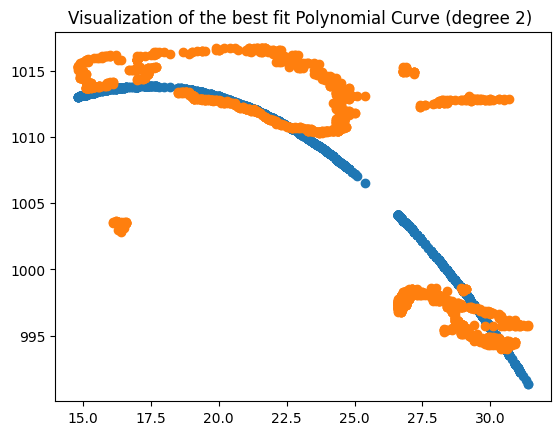

In [489]:
plt.scatter(x_train,reg_Model12.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 2) ")
plt.show()

R2 Score of Model12

In [490]:
from sklearn.metrics import r2_score
y_predict12=reg_Model12.predict(x_test_p)
score12=r2_score(y_test,y_predict12)
score12

0.628054612377033

MSE of Model12

In [491]:
mse12 = np.mean(np.square(np.array(y_predict12) - np.array(y_test)))
mse12

26.209541364676713

MAE of Model12

In [492]:
mae12 = np.mean(np.abs(np.array(y_predict12) - np.array(y_test)))
mae12

3.6895136221702556

Polynomial function of degree  is 3 implemented

In [493]:
p=PolynomialFeatures(degree=3,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [494]:
x_train_p

array([[1.0000000e+00, 2.1700000e+01, 4.7089000e+02, 1.0218313e+04],
       [1.0000000e+00, 2.4300000e+01, 5.9049000e+02, 1.4348907e+04],
       [1.0000000e+00, 2.8900000e+01, 8.3521000e+02, 2.4137569e+04],
       ...,
       [1.0000000e+00, 2.3800000e+01, 5.6644000e+02, 1.3481272e+04],
       [1.0000000e+00, 2.1100000e+01, 4.4521000e+02, 9.3939310e+03],
       [1.0000000e+00, 2.4500000e+01, 6.0025000e+02, 1.4706125e+04]])

In [495]:
x_test_p

array([[1.0000000e+00, 1.5800000e+01, 2.4964000e+02, 3.9443120e+03],
       [1.0000000e+00, 1.9000000e+01, 3.6100000e+02, 6.8590000e+03],
       [1.0000000e+00, 3.0900000e+01, 9.5481000e+02, 2.9503629e+04],
       ...,
       [1.0000000e+00, 2.7000000e+01, 7.2900000e+02, 1.9683000e+04],
       [1.0000000e+00, 2.9400000e+01, 8.6436000e+02, 2.5412184e+04],
       [1.0000000e+00, 1.8700000e+01, 3.4969000e+02, 6.5392030e+03]])

Model with degree 3 fitted. Intercept and Coefficients are printed.

In [496]:
reg_Model13=LinearRegression()
reg_Model13.fit(x_train_p,y_train)
print(reg_Model13.coef_)
print(reg_Model13.intercept_)

[ 0.00000000e+00  2.73839570e+01 -1.15691366e+00  1.50618609e-02]
809.6546968786372


Visualization of the best fit Polynomial Curve (degree 3)

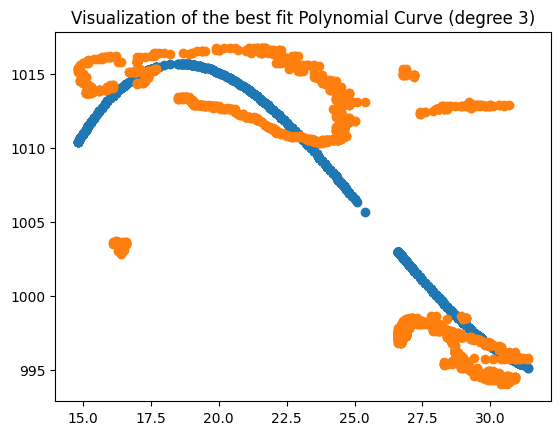

In [497]:
plt.scatter(x_train,reg_Model13.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 3)")
plt.show()

R2 Score of Model13

In [498]:
y_predict13=reg_Model13.predict(x_test_p)
score13=r2_score(y_test,y_predict13)
score13

0.6451846178398142

MSE of Model13

In [499]:
mse13 = np.mean(np.square(np.array(y_predict13) - np.array(y_test)))
mse13

25.002456664357723

MAE of Model13

In [500]:
mae13 = np.mean(np.abs(np.array(y_predict13) - np.array(y_test)))
mae13

3.7451689762709193

Train-Test Split in the ratio -> 70:30

In [501]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Polynomial function of degree is 4 implemented

In [502]:
p=PolynomialFeatures(degree=4,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [503]:
x_train_p

array([[1.00000000e+00, 2.94000000e+01, 8.64360000e+02, 2.54121840e+04,
        7.47118210e+05],
       [1.00000000e+00, 2.72000000e+01, 7.39840000e+02, 2.01236480e+04,
        5.47363226e+05],
       [1.00000000e+00, 1.51000000e+01, 2.28010000e+02, 3.44295100e+03,
        5.19885601e+04],
       ...,
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05],
       [1.00000000e+00, 2.11000000e+01, 4.45210000e+02, 9.39393100e+03,
        1.98211944e+05],
       [1.00000000e+00, 2.45000000e+01, 6.00250000e+02, 1.47061250e+04,
        3.60300062e+05]])

In [504]:
x_test_p

array([[1.00000000e+00, 1.58000000e+01, 2.49640000e+02, 3.94431200e+03,
        6.23201296e+04],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, 6.85900000e+03,
        1.30321000e+05],
       [1.00000000e+00, 3.09000000e+01, 9.54810000e+02, 2.95036290e+04,
        9.11662136e+05],
       ...,
       [1.00000000e+00, 1.52000000e+01, 2.31040000e+02, 3.51180800e+03,
        5.33794816e+04],
       [1.00000000e+00, 2.96000000e+01, 8.76160000e+02, 2.59343360e+04,
        7.67656346e+05],
       [1.00000000e+00, 1.69000000e+01, 2.85610000e+02, 4.82680900e+03,
        8.15730721e+04]])

Model with degree 4 fitted. Intercept and Coefficients are printed.

In [505]:
reg_Model24=LinearRegression()
reg_Model24.fit(x_train_p,y_train)
print(reg_Model24.coef_)
print(reg_Model24.intercept_)

[ 0.00000000e+00 -1.89386522e+02  1.34826626e+01 -4.15524150e-01
  4.66159219e-03]
1987.3445849081477


Visualization of the best fit Polynomial Curve (degree 4)

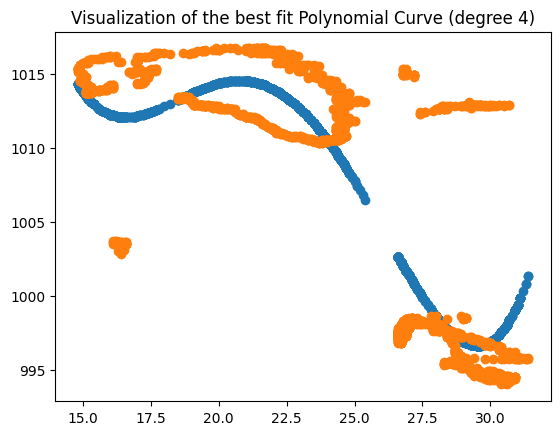

In [506]:
plt.scatter(x_train,reg_Model24.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 4)")
plt.show()

R2 Score of Model24

In [507]:
y_predict24=reg_Model24.predict(x_test_p)
score24=r2_score(y_test,y_predict24)
score24

0.6941666046410397

MSE of Model24

In [508]:
mse24 = np.mean(np.square(np.array(y_predict24) - np.array(y_test)))
mse24

21.679295208217564

MAE of Model24

In [509]:
mae24 = np.mean(np.abs(np.array(y_predict24) - np.array(y_test)))
mae24

3.1852525641917366

Polynomial function of degree is 5 implemented

In [510]:
p=PolynomialFeatures(degree=5,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [511]:
x_train_p

array([[1.00000000e+00, 2.94000000e+01, 8.64360000e+02, 2.54121840e+04,
        7.47118210e+05, 2.19652754e+07],
       [1.00000000e+00, 2.72000000e+01, 7.39840000e+02, 2.01236480e+04,
        5.47363226e+05, 1.48882797e+07],
       [1.00000000e+00, 1.51000000e+01, 2.28010000e+02, 3.44295100e+03,
        5.19885601e+04, 7.85027258e+05],
       ...,
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05, 7.63633171e+06],
       [1.00000000e+00, 2.11000000e+01, 4.45210000e+02, 9.39393100e+03,
        1.98211944e+05, 4.18227202e+06],
       [1.00000000e+00, 2.45000000e+01, 6.00250000e+02, 1.47061250e+04,
        3.60300062e+05, 8.82735153e+06]])

In [512]:
x_test_p

array([[1.00000000e+00, 1.58000000e+01, 2.49640000e+02, 3.94431200e+03,
        6.23201296e+04, 9.84658048e+05],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, 6.85900000e+03,
        1.30321000e+05, 2.47609900e+06],
       [1.00000000e+00, 3.09000000e+01, 9.54810000e+02, 2.95036290e+04,
        9.11662136e+05, 2.81703600e+07],
       ...,
       [1.00000000e+00, 1.52000000e+01, 2.31040000e+02, 3.51180800e+03,
        5.33794816e+04, 8.11368120e+05],
       [1.00000000e+00, 2.96000000e+01, 8.76160000e+02, 2.59343360e+04,
        7.67656346e+05, 2.27226278e+07],
       [1.00000000e+00, 1.69000000e+01, 2.85610000e+02, 4.82680900e+03,
        8.15730721e+04, 1.37858492e+06]])

Model with degree 5 fitted. Intercept and Coefficients are printed.

In [513]:
reg_Model25=LinearRegression()
reg_Model25.fit(x_train_p,y_train)
print(reg_Model25.coef_)
print(reg_Model25.intercept_)

[ 0.00000000e+00 -1.16543025e+03  1.02342764e+02 -4.39538479e+00
  9.24123857e-02 -7.62608087e-04]
6204.751845301771


Visualization of the best fit Polynomial Curve (degree 5)

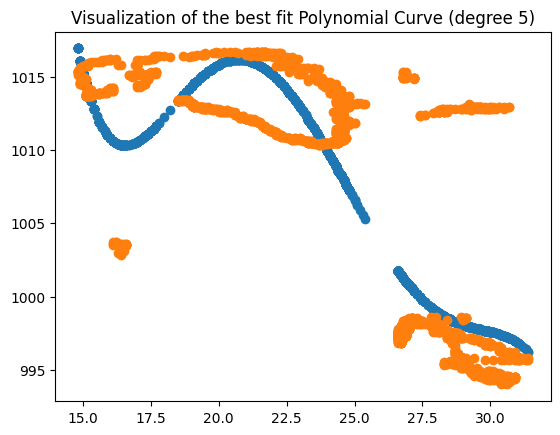

In [514]:
plt.scatter(x_train,reg_Model25.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 5)")
plt.show()

R2 Score of Model25

In [515]:
y_predict25=reg_Model25.predict(x_test_p)
score25=r2_score(y_test,y_predict25)
score25

0.7042085681914689

MSE of Model25

In [516]:
mse25 = np.mean(np.square(np.array(y_predict25) - np.array(y_test)))
mse25

20.96746093640956

MAE of Model25

In [517]:
mae25 = np.mean(np.abs(np.array(y_predict25) - np.array(y_test)))
mae25

3.3119410844488186

Train-Test Split in the ratio -> 80:20

In [518]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Polynomial function of degree is 6 implemented

In [519]:
p=PolynomialFeatures(degree=6,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [520]:
x_train_p

array([[1.00000000e+00, 1.53000000e+01, 2.34090000e+02, ...,
        5.47981281e+04, 8.38411360e+05, 1.28276938e+07],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, ...,
        5.00641154e+05, 1.33170547e+07, 3.54233655e+08],
       [1.00000000e+00, 1.92000000e+01, 3.68640000e+02, ...,
        1.35895450e+05, 2.60919263e+06, 5.00964985e+07],
       ...,
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        3.20854274e+05, 7.63633171e+06, 1.81744695e+08],
       [1.00000000e+00, 2.11000000e+01, 4.45210000e+02, ...,
        1.98211944e+05, 4.18227202e+06, 8.82459396e+07],
       [1.00000000e+00, 2.45000000e+01, 6.00250000e+02, ...,
        3.60300062e+05, 8.82735153e+06, 2.16270113e+08]])

In [521]:
x_test_p

array([[1.00000000e+00, 1.58000000e+01, 2.49640000e+02, ...,
        6.23201296e+04, 9.84658048e+05, 1.55575972e+07],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        1.30321000e+05, 2.47609900e+06, 4.70458810e+07],
       [1.00000000e+00, 3.09000000e+01, 9.54810000e+02, ...,
        9.11662136e+05, 2.81703600e+07, 8.70464124e+08],
       ...,
       [1.00000000e+00, 2.85000000e+01, 8.12250000e+02, ...,
        6.59750062e+05, 1.88028768e+07, 5.35881988e+08],
       [1.00000000e+00, 1.65000000e+01, 2.72250000e+02, ...,
        7.41200625e+04, 1.22298103e+06, 2.01791870e+07],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, ...,
        5.00641154e+05, 1.33170547e+07, 3.54233655e+08]])

Model with degree 6 fitted. Intercept and Coefficients are printed.

In [522]:
reg_Model36=LinearRegression()
reg_Model36.fit(x_train_p,y_train)
print(reg_Model36.coef_)
print(reg_Model36.intercept_)

[ 0.00000000e+00  4.36688865e+03 -5.27776115e+02  3.33767858e+01
 -1.16495670e+00  2.12864950e-02 -1.59216206e-04]
-13761.060845998289


Visualization of the best fit Polynomial Curve (degree 6)

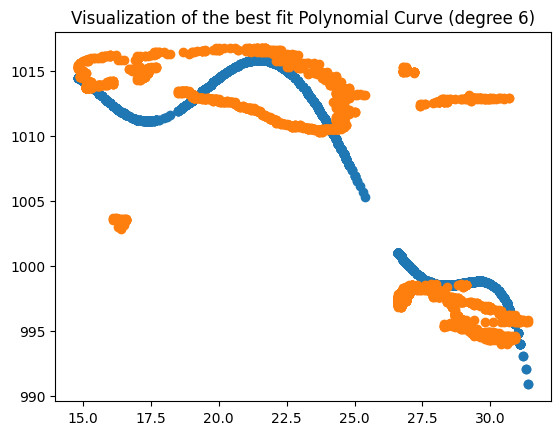

In [523]:
plt.scatter(x_train,reg_Model36.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 6)")
plt.show()

R2 Score of Model36

In [524]:
y_predict36=reg_Model36.predict(x_test_p)
score36=r2_score(y_test,y_predict36)
score36

0.6955199132228507

MSE of Model36

In [525]:
mse36 = np.mean(np.square(np.array(y_predict36) - np.array(y_test)))
mse36

21.615369062582992

MAE of Model36

In [526]:
mae36 = np.mean(np.abs(np.array(y_predict36) - np.array(y_test)))
mae36

3.2066844729492647

Polynomial function of degree is 7 implemented

In [527]:
p=PolynomialFeatures(degree=7,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [528]:
x_train_p

array([[1.00000000e+00, 1.53000000e+01, 2.34090000e+02, ...,
        8.38411360e+05, 1.28276938e+07, 1.96263715e+08],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, ...,
        1.33170547e+07, 3.54233655e+08, 9.42261521e+09],
       [1.00000000e+00, 1.92000000e+01, 3.68640000e+02, ...,
        2.60919263e+06, 5.00964985e+07, 9.61852772e+08],
       ...,
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        7.63633171e+06, 1.81744695e+08, 4.32552373e+09],
       [1.00000000e+00, 2.11000000e+01, 4.45210000e+02, ...,
        4.18227202e+06, 8.82459396e+07, 1.86198933e+09],
       [1.00000000e+00, 2.45000000e+01, 6.00250000e+02, ...,
        8.82735153e+06, 2.16270113e+08, 5.29861776e+09]])

In [529]:
x_test_p

array([[1.00000000e+00, 1.58000000e+01, 2.49640000e+02, ...,
        9.84658048e+05, 1.55575972e+07, 2.45810035e+08],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        2.47609900e+06, 4.70458810e+07, 8.93871739e+08],
       [1.00000000e+00, 3.09000000e+01, 9.54810000e+02, ...,
        2.81703600e+07, 8.70464124e+08, 2.68973414e+10],
       ...,
       [1.00000000e+00, 2.85000000e+01, 8.12250000e+02, ...,
        1.88028768e+07, 5.35881988e+08, 1.52726367e+10],
       [1.00000000e+00, 1.65000000e+01, 2.72250000e+02, ...,
        1.22298103e+06, 2.01791870e+07, 3.32956586e+08],
       [1.00000000e+00, 2.66000000e+01, 7.07560000e+02, ...,
        1.33170547e+07, 3.54233655e+08, 9.42261521e+09]])

Model with degree 7 fitted. Intercept and Coefficients are printed.

In [530]:
reg_Model37=LinearRegression()
reg_Model37.fit(x_train_p,y_train)
print(reg_Model37.coef_)
print(reg_Model37.intercept_)

[ 0.00000000e+00 -2.53866488e+04  3.54692614e+03 -2.73178439e+02
  1.25218589e+01 -3.41461270e-01  5.12693328e-03 -3.26861154e-05]
78297.44269879082


Visualization of the best fit Polynomial Curve (degree 7)

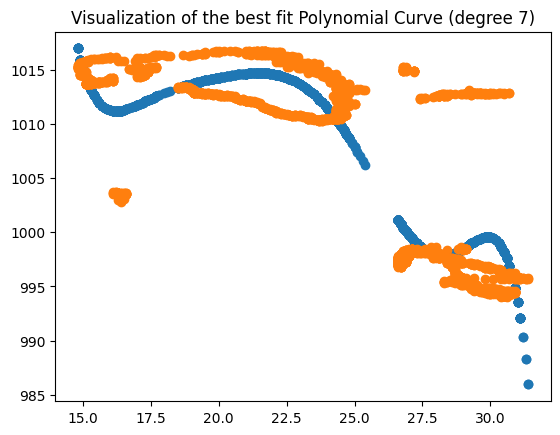

In [531]:
plt.scatter(x_train,reg_Model37.predict(x_train_p))
plt.scatter(x_train,y_train)
plt.title("Visualization of the best fit Polynomial Curve (degree 7)")
plt.show()

R2 Score of Model37

In [532]:
y_predict37=reg_Model37.predict(x_test_p)
score37=r2_score(y_test,y_predict37)
score37

0.7041961435935306

MSE of Model37

In [533]:
mse37 = np.mean(np.square(np.array(y_predict37) - np.array(y_test)))
mse37

20.999434130616496

MAE of Model37

In [534]:
mae37 = np.mean(np.abs(np.array(y_predict37) - np.array(y_test)))
mae37

3.1524489677729215

After experimenting with 3 different Train-Test Split ratio and 6 different degree for the polynomial curve, we can observe that with increase in the degree of the polynomial function, R2 score value increases and both MSE(Mean Squared Error) and MAE(Mean Absolute Error) term value decreases.

This trend is evident from the visualised best fit Polynomial curve where we see the curve tends to deviate less from actual values resulting in better fit of the model of testing data.

During the process, the highest R2 score that was achieved is 0.7042 (for 70:30 split and degree 5 case). Least MSE and MAE value being 20.99 and 3.15 respectively (both of them for 80:20 split and degree 7 case)